**4.2** 자동차의 연비에 영향을 미치는 요소는 마력뿐만 아니라 총중량도 중요한 요소가 될 것이다. 다음은 P 자동차 회사의 차종과 마력, 뿐만 아니라 자동차의 총중량(단위 : kg)을 추가한 표이다

1) 위의 자료를 바탕으로 적절한 선형 회귀 모델을 구현하여라. 이 모델의 계수와 절편, 예측모델의 점수를 출력하여라.

In [2]:
import pandas as pd

df = pd.DataFrame({
    'Name' : ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'HP' : [130, 250, 190, 300, 210, 220, 170],
    'Gross Weight' : [1900, 2600, 2200, 2900, 2400, 2300, 2100],
    'Efficiency' : [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]
    })

company_df = df.set_index('Name')
print(company_df)

       HP  Gross Weight  Efficiency
Name                               
A     130          1900        16.3
B     250          2600        10.2
C     190          2200        11.1
D     300          2900         7.1
E     210          2400        12.1
F     220          2300        13.2
G     170          2100        14.2


In [13]:
from sklearn.linear_model import LinearRegression
x = company_df[['HP', 'Gross Weight']]
y = company_df['Efficiency']

lin_model1 = LinearRegression()
lin_model1.fit(x, y)

print('계수: ', lin_model1.coef_)
print('절편: ', lin_model1.intercept_)
print('예측 점수: ', lin_model1.score(x, y))

계수:  [-0.00689189 -0.00731081]
절편:  30.60405405405406
예측 점수:  0.8871254041192391


2) 위의 선형 회귀 모델을 바탕으로 270마력의 신형엔진을 가진 총중량 2,500kg의 자동차를 개발하려 한다. 이 자동차의 연비를 선형 회귀 모델에 적용하여 다음과 같이 구해보라. 

In [23]:
print('270 마력 2500kg 자동차의 예상 연비 :', lin_model1.predict([[270, 2500]])[0].round(2), 'km/L')

270 마력 2500kg 자동차의 예상 연비 : 10.47 km/L


C:\Users\JAKE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3) 마력과 총중량, 연비 사이의 상관관계를 쌍플롯으로 그려 보라.

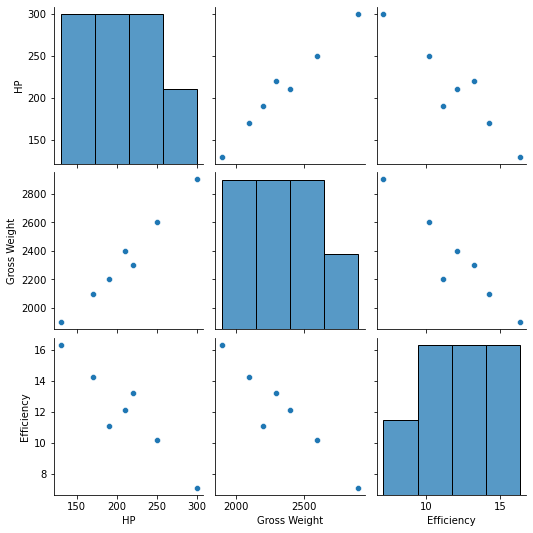

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(company_df[['HP', 'Gross Weight', 'Efficiency']])
plt.show()

4) 마력과 총중량, 연비사이의 상관관계를 seaborn의 히트맵으로 가시화해 보라.

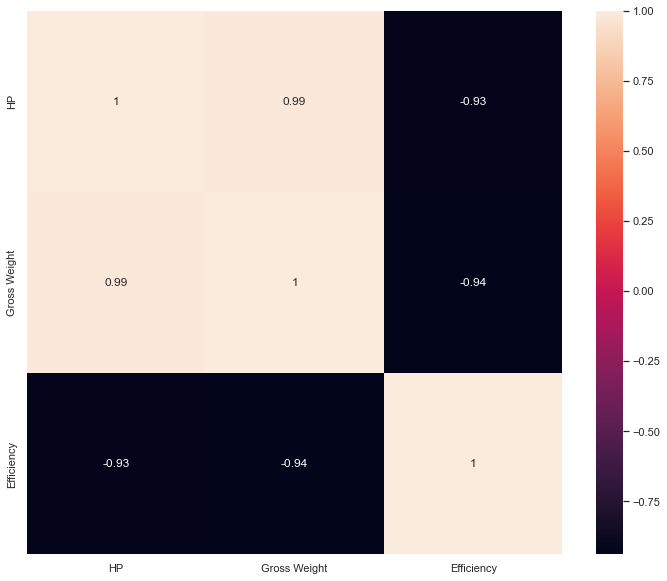

In [22]:
sns.set(rc={'figure.figsize':(12,10)})            # 상관행렬 가시
correlation_matrix = company_df.corr().round(2)   # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()  

5) 앞서 풀어본 3), 4)의 내용을 바탕으로 마력, 총중량, 연비의 상관관계를 조사하고 이를 3개 이상의 문장으로 요약 정리하라.

- 변수들은 모두 선형관계이다.

- 마력과 총중량의 상관관계는 0.99이고, 마력과 연비의 상관관계는 -0.93이고, 총중량과 연비의 상관관계는 -0.94이다.

- 마력과 총중량은 양의 관계이고 마력과 연비, 총중량과 연비는 음의 관계이다.